In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import make_blobs 
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

## Section A: Dataset Loading & Exploration

In [41]:
##Load the dataset using pandas and print the first 5 rows.
df=pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [247]:
##Print the shape and column names of the dataset.
shape=df.shape[0]
print('shape:\n',shape)
columns=df.columns
print('columns:\n',columns)

shape:
 200
columns:
 Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')


In [43]:
##Check for missing values and describe how many nulls are in each column.
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

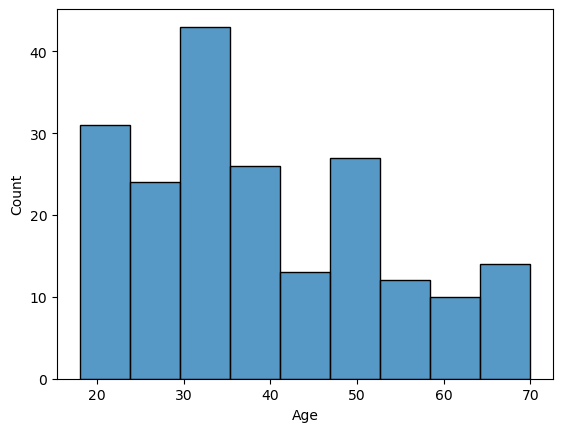

In [44]:
##Create a histogram of the Age column.
sns.histplot(df['Age'])

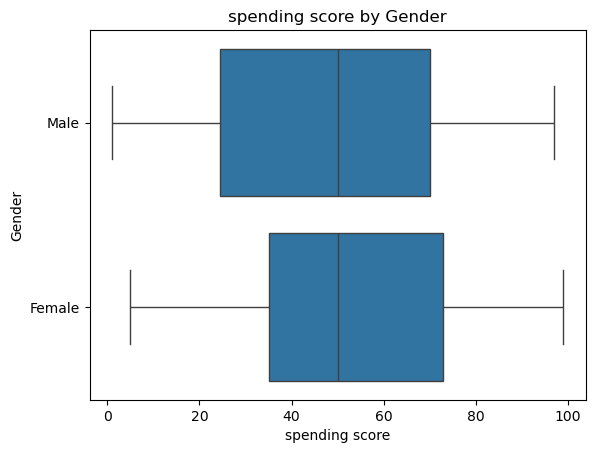

In [45]:
##Use seaborn to create a boxplot comparing Spending Score (1-100) by Gender.
sns.boxplot(x='Spending Score (1-100)',y='Gender',data=df)
plt.title('spending score by Gender')
plt.xlabel('spending score')
plt.ylabel('Gender')
plt.show()

In [46]:
##Normalize the columns Annual Income (k$) and Spending Score (1-100) using MinMaxScaler.
scaler= MinMaxScaler()
scaled=scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
scaled_df=pd.DataFrame(scaled,columns=[['Annual Income (k$)', 'Spending Score (1-100)']])
print(scaled_df.head())

  Annual Income (k$) Spending Score (1-100)
0           0.000000               0.387755
1           0.000000               0.816327
2           0.008197               0.051020
3           0.008197               0.775510
4           0.016393               0.397959


## KMeans Clustering

In [47]:
## Select the columns ['Annual Income (k$)', 'Spending Score (1-100)'] for clustering and assign to variable X.
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [48]:
df_encoded=pd.get_dummies(df,columns=['Gender',])
df_encoded[['Gender_Male','Gender_Female']]=df_encoded[['Gender_Male','Gender_Female']].astype(int)
print(df_encoded)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Gender_Female  Gender_Male  
0                0            1  
1                0            1  
2                1            0  
3                1            0  
4            

In [49]:
df_encoded.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [77]:
##Use the elbow method to determine the optimal number of clusters for KMeans. Plot the within-cluster sum of squares for k = 1 to 10.
inertias=[]
K_range=range(1,10)
for k in K_range:
    model=KMeans(n_clusters=k)
    model.fit(df_encoded)
    inertias.append(model.inertia_)

In [ ]:
## Based on your plot, choose an appropriate value for k. Initialize and fit a KMeans model.
X = df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=42)
predicted_labels = kmeans.fit_predict(X)

In [97]:
## Add the predicted cluster labels as a new column in the DataFrame.
df_encoded['predict cluster']=predicted_labels
print(df_encoded['predict cluster'])

0      4
1      2
2      4
3      2
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Name: predict cluster, Length: 200, dtype: int32


In [ ]:
## Plot the KMeans clusters in 2D using plt.scatter(), coloring by cluster
## generate sample 2D data
X,y=make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=42)

In [101]:
##Print the coordinates of the cluster centroids.
centroids=kmeans.cluster_centers_
print('Cluster Centroids:\n', centroids)

Cluster Centroids:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [ ]:
## Calculate and print the number of data points in each cluster.
# Assign cluster labels to the DataFrame
df_encoded['cluster_labels']=kmeans.labels_
## count the number of data points in each cluster
cluster_counts=df_encoded['cluster_labels'].value_counts().sort_index()
print("Number of data points in each cluster:\n",cluster_counts)

Number of data points in each cluster:
 0      2
1      2
2      2
3      2
4      2
      ..
195    1
196    1
197    1
198    1
199    1
Name: cluster_labels, Length: 200, dtype: int32


In [134]:
##Which cluster has the highest average income? Write code to find out.
#group by cluster
avg_per_cluster=df_encoded.groupby('cluster_labels')['Annual Income (k$)'].mean()
print('highest average income in the cluster above:\n',avg_per_cluster.idxmax())

highest average income in the cluster above:
 3


Cluster 3 contains the group of customers with the highest average annual income

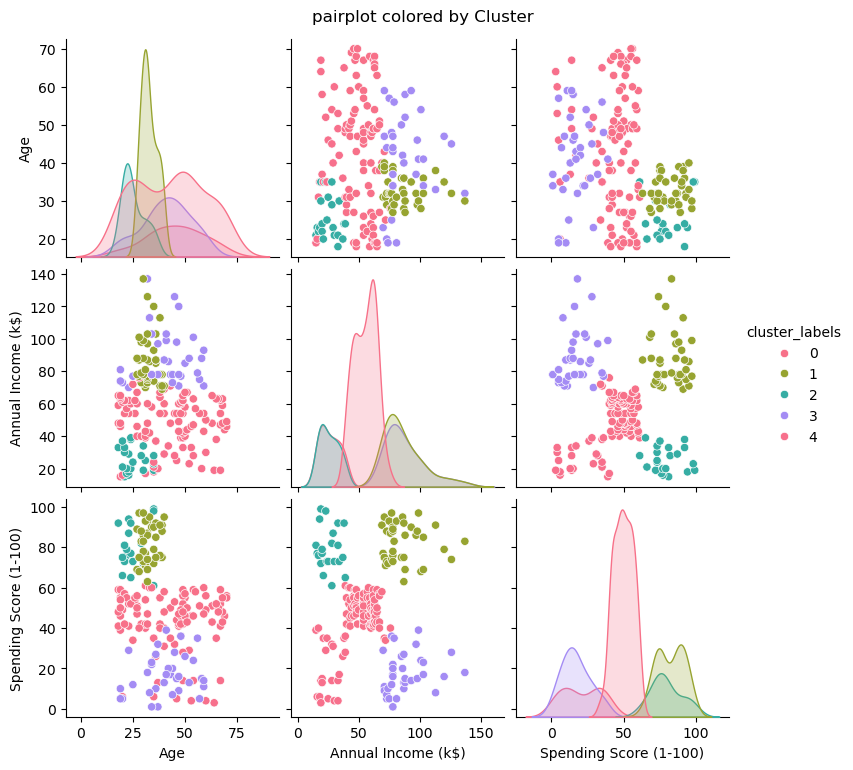

In [144]:
##Plot a seaborn.pairplot showing Age, Annual Income (k$), and Spending Score (1-100) colored by cluster.
sns.pairplot(df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'cluster_labels']], 
             hue='cluster_labels', palette='husl')
plt.suptitle('pairplot colored by Cluster',y=1.02)
plt.show()

In [ ]:
## Modify the KMeans model to include Age as well (i.e., use 3 features). Plot the new clusters
X = df_encoded[['Age','Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=42)
predicted_labels = kmeans.fit_predict(X)

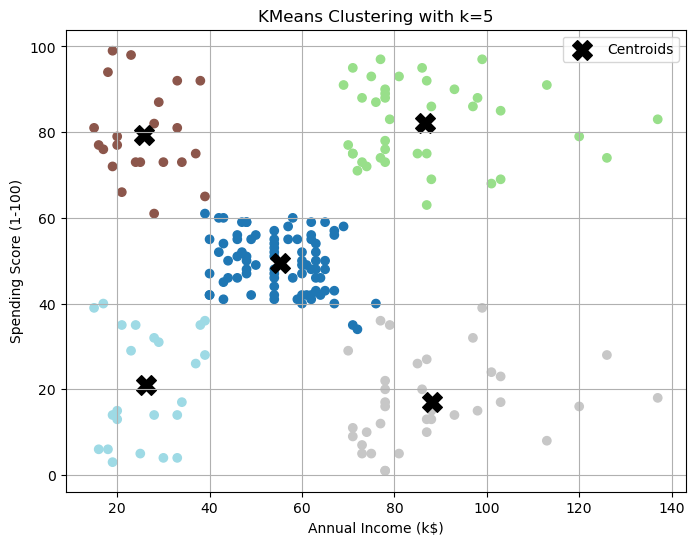

In [162]:
## What happens when you set k to a very large number (e.g., 15)? Fit the model and describe in comments.
kmeans_large = KMeans(n_clusters=5, random_state=42)
df_encoded['cluster_5'] = kmeans_large.fit_predict(X)
# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df_encoded['cluster_5'], cmap='tab20')
plt.scatter(kmeans_large.cluster_centers_[:, 0], kmeans_large.cluster_centers_[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title('KMeans Clustering with k=5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

  Annual Income (k$) Spending Score (1-100)
0          -1.738999              -0.434801
1          -1.738999               1.195704
2          -1.700830              -1.715913
3          -1.700830               1.040418
4          -1.662660              -0.395980


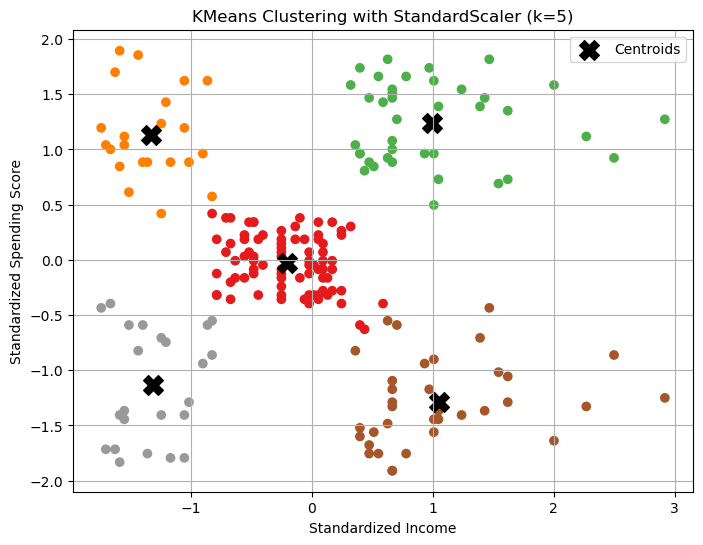

In [ ]:
## Use StandardScaler instead of MinMaxScaler and re-run the clustering.
scaler= StandardScaler()
X_scaled=scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
scaled_df=pd.DataFrame(X_scaled,columns=[['Annual Income (k$)', 'Spending Score (1-100)']])
print(scaled_df.head())
kmeans_std = KMeans(n_clusters=5, random_state=42)
df_encoded['Cluster_Standard'] = kmeans_std.fit_predict(X_scaled)
# Plot the clustering results on scaled features
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_encoded['Cluster_Standard'], cmap='Set1')
plt.scatter(kmeans_std.cluster_centers_[:, 0], kmeans_std.cluster_centers_[:, 1],
            c='black', s=200, marker='X', label='Centroids')
plt.xlabel('Standardized Income')
plt.ylabel('Standardized Spending Score')
plt.title('KMeans Clustering with StandardScaler (k=5)')
plt.legend()
plt.grid(True)
plt.show()


##  Section C: Hierarchical Clustering

In [ ]:
## Use scipy.cluster.hierarchy to generate a linkage matrix using 'ward' linkage
linked=linkage(df_encoded, method='ward')

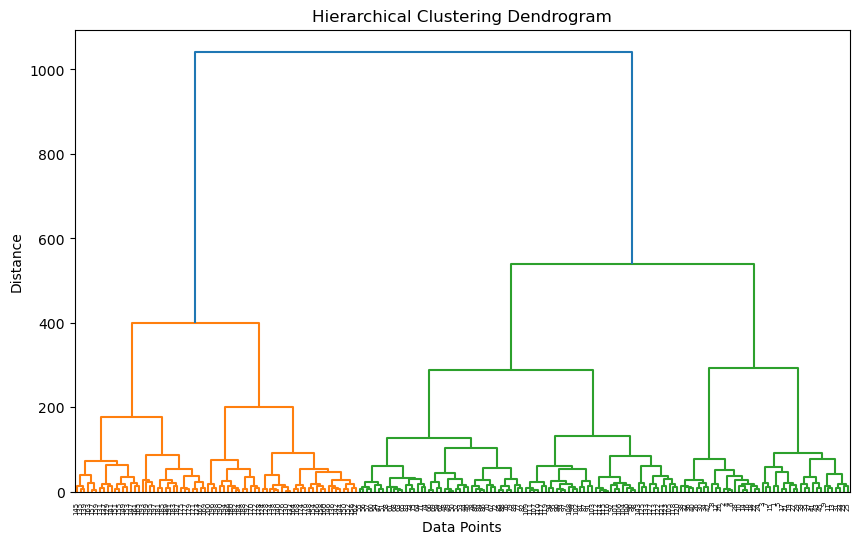

In [ ]:
## Plot a dendrogram of the data using the linkage matrix.
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=range(1, len(df_encoded)+1),
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


#From the dendrogram, determine how many clusters would make sense (cutting at a good height).
2 it cuts the distance of approximately of 500 to the two main clusters

In [173]:
##Use AgglomerativeClustering from sklearn with the chosen number of clusters and print the labels.
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_encoded['Cluster'] = model.fit_predict(df_encoded)

In [ ]:
##Add the labels as a column to the dataset and compare the results with KMeans labels using pd.crosstab().
# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg.fit_predict(df_encoded)
df_encoded['Agglomerative'] = agg_labels
# Apply KMeans Clustering
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans_labels=kmeans.fit_predict(df_encoded.drop(columns='Agglomerative'))
df_encoded['KMeans']=kmeans_labels
# compare the results using the crosstab
comparison=pd.crosstab(df_encoded['Agglomerative'],df_encoded['KMeans'])
print('comparison of agglomerative vs KMeans clustering:\n')
print(comparison)

comparison of agglomerative vs KMeans clustering:

KMeans          0   1   2
Agglomerative            
0               7  66   0
1               0   0  44
2              64   2  17


Agglomerative cluster 1 and KMeans cluster 2

- 44 points in Agglomerative cluster 1 are exactly matched to KMeans cluster 2- this shows a perfect alignment for one cluster between both algorithms

Agglomerative cluster 0 and KMeans cluster 1 
- 66 points overlaps meaning most of Agglomerative Cluster 0 members are classified as KMeans Cluster 1
- however 7 points in same Agglomerative Cluster went to KMeans cluster 0 indicating partial mismatch

Agglomerative Cluster 2 is Most Mixed
- this cluster splits across all KMeans clusters suggesting a significant disagreement in how this group should be clustered


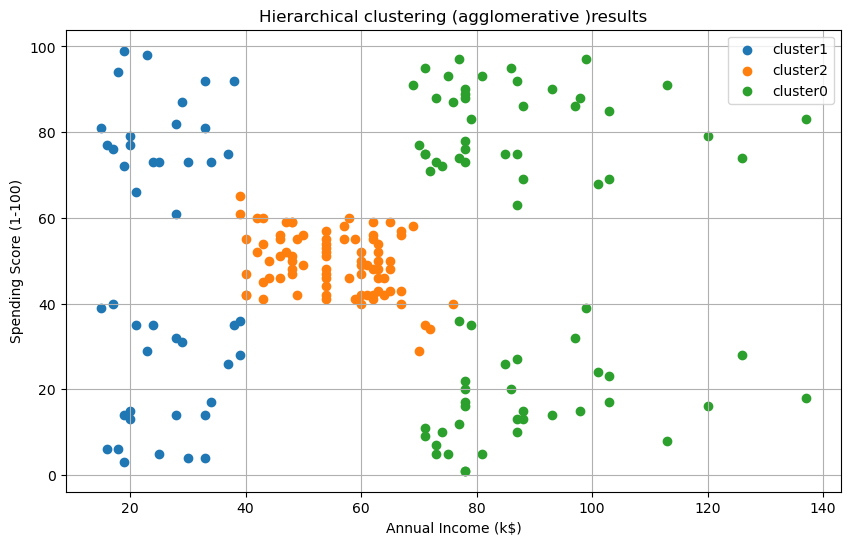

In [206]:
##Create a 2D scatter plot of the hierarchical clusters using the same two features.
x_feature='Annual Income (k$)'
y_feature='Spending Score (1-100)'
plt.figure(figsize=(10, 6))
for cluster in df_encoded['Cluster'].unique():
    plt.scatter(
        df_encoded[df_encoded['Cluster']==cluster][x_feature],
        df_encoded[df_encoded['Cluster']==cluster][y_feature],
        label=f'cluster{cluster}'
    )
plt.title('Hierarchical clustering (agglomerative )results')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.grid(True)
plt.legend()
plt.show()

## Section D: Interpretation + Strategy

In [211]:
## Write a function that takes a cluster label and prints summary statistics for that group (mean income, age, spending score).
def summarize_cluster(df_encoded,cluster_label):
    group=df_encoded[df_encoded['cluster']==cluster_label]
    print(f"Summary for Cluster {cluster_label}:")
    print("Mean Annual Income (k$):", group['Annual Income (k$)'].mean())
    print("Mean Age:", group['Age'].mean())
    print("Mean Spending Score (1-100):", group['Spending Score (1-100)'].mean())
    print("Count:", group.shape[0])
    print("\n")

In [ ]:

## Identify the cluster that represents high income but low spending customers.
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
high_income_low_spend = cluster_summary.sort_values(by=['Annual Income (k$)', 'Spending Score (1-100)'], ascending=[False, True])
print(high_income_low_spend)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
3                 88.200000               17.114286
1                 86.538462               82.128205
0                 55.296296               49.518519
4                 26.304348               20.913043
2                 25.727273               79.363636


Suggest a marketing strategy for this group. Write it as a comment.
 For cluster 3 
 - Use targeted campaigns to offer exclusive, premium products or services.
 
 - Focus on high-value loyalty programs, prestige branding, and VIP customer experiences to encourage spending.


In [243]:
## Identify the cluster that represents low income but high spending customers.
low_income_high_spend=cluster_summary.sort_values(by=['Annual Income (k$)', 'Spending Score (1-100)'])
print(low_income_high_spend)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
2                 25.727273               79.363636
4                 26.304348               20.913043
0                 55.296296               49.518519
1                 86.538462               82.128205
3                 88.200000               17.114286


Suggest a retention strategy for this group. Write it as a comment.
for cluster 2
- Offer discounts, referral rewards, and flexible payment options.

- Strengthen brand loyalty with personalized communication, social media engagement, and gamified incentives.

In [ ]:
## Export the clustered dataset to a new CSV file using df.to_csv().
df_encoded.to_csv('clustered_customers.csv',index=False)
print("Clustered data exported to 'clustered_customers.csv'")

Clustered data exported to 'clustered_customers.csv'
